<a href="https://colab.research.google.com/github/RamyaBodepudi/Heart-Disease-Data-Analysis/blob/main/Heart_Disease_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Data Analysis: Uncovering Patterns and Predictive Insights

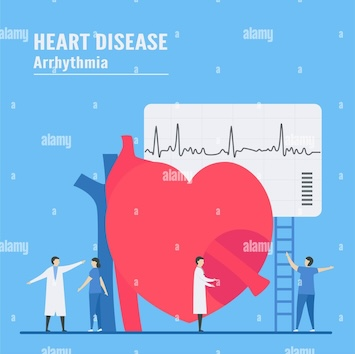

## Project Overview:
The project aimed to conduct a comprehensive analysis of a heart disease dataset to gain insights into the relationships between various factors such as age, cholesterol levels, chest pain types, and the presence of heart disease. The analysis was conducted to provide valuable insights into the dataset and draw meaningful conclusions.
### Data Collection:
The heart disease dataset was obtained from a Kaggle. It contains information on various factors such as age, sex, chest pain types, resting blood pressure, cholesterol levels, and the presence of heart disease.
### Data Exploration and Understanding:
Explored the dataset to understand its structure, features, and content. Conducted descriptive statistics and visualizations to summarize the dataset. Checked for missing values, duplicate rows, and data types.
Data Quality Assessment:
### Exploratory Data Analysis (EDA):
Explored the distribution of ages, cholesterol levels, and heart disease prevalence. Analyzed gender distribution and frequency distribution of chest pain types. Investigated the relationship between age and cholesterol levels. Explored variations of maximum heart rate and resting blood pressure across different factors. Determined the percentage of patients with exercise-induced angina. Analyzed the distribution of ST depression induced by exercise relative to rest. Investigated the relationship between heart disease and other risk factors such as age, cholesterol, and resting blood pressure.

In [1]:
# Install Kaggle API
!pip install kaggle -q

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile


In [94]:
# Upload Kaggle API token as a JSON file
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [95]:
# Set up Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [98]:
# Download the dataset
!kaggle datasets download -d amirmahdiabbootalebi/heart-disease
with zipfile.ZipFile('heart-disease.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

Dataset URL: https://www.kaggle.com/datasets/amirmahdiabbootalebi/heart-disease
License(s): CC0-1.0
heart-disease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [111]:
def get_input_data():
  # List the contents of the dataset directory
  file_name_list = os.listdir('/content/dataset')
  prompt_message = 'Choose an index number of the file for data analysis among the following:\n\n'
  i = 0
  for file_name in file_name_list:
    i += 1
    prompt_message = prompt_message+str(i)+'. '+file_name+ "\n\n"

  picked_index_number = input(prompt_message)
  if len(file_name_list) < int(picked_index_number) or int(picked_index_number) < 1:
    print("It is an invalid index number, please pick the correct index number")
    get_input_data()
  else:
    file_directory = '/content/dataset/'+file_name_list[int(picked_index_number)-1]
    df = pd.read_csv(file_directory)

In [112]:
get_input_data()

Choose an index number of the file for data analysis among the following:

1. heart.csv

1


## Data Collection

In [114]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [115]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [116]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [117]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [118]:
df.shape

(918, 12)

In [119]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Data Cleaning
#### 1. Are there any missing values in the dataset?

In [120]:
missing_values = df.isnull()
missing_values

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


#### 2. How many missing values are there in each column?

In [121]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### 3. Are there any duplicate rows in the dataset?


In [122]:
duplicate_rows = df.duplicated().any()
duplicate_rows

False

#### 4. Are all columns of the dataset in the correct data type?


In [123]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

#### Convert 'object' columns to 'string' by iterating over each value


In [124]:
df = df.astype({'Sex': 'string', 'ChestPainType': 'string', 'RestingECG': 'string', 'ExerciseAngina': 'string',  'ST_Slope': 'string'})
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

## Data Exploration and Visualization

#### 5. What is the distribution of ages in the dataset?

<Figure size 1000x600 with 0 Axes>

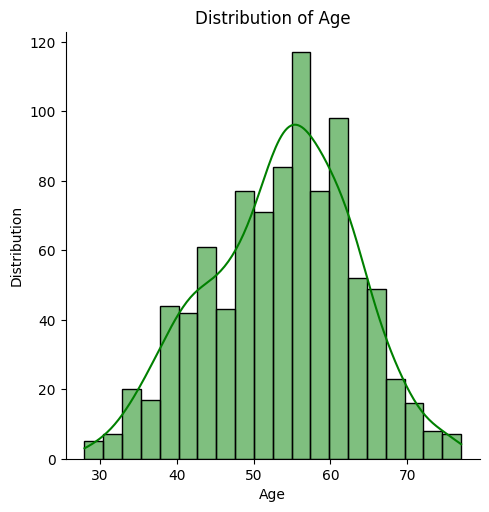

In [125]:
plt.figure(figsize=(10, 6))
sns.displot(df['Age'], bins=20, kde=True, color= 'green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.show()

#### 6. How are cholesterol levels distributed among patients?

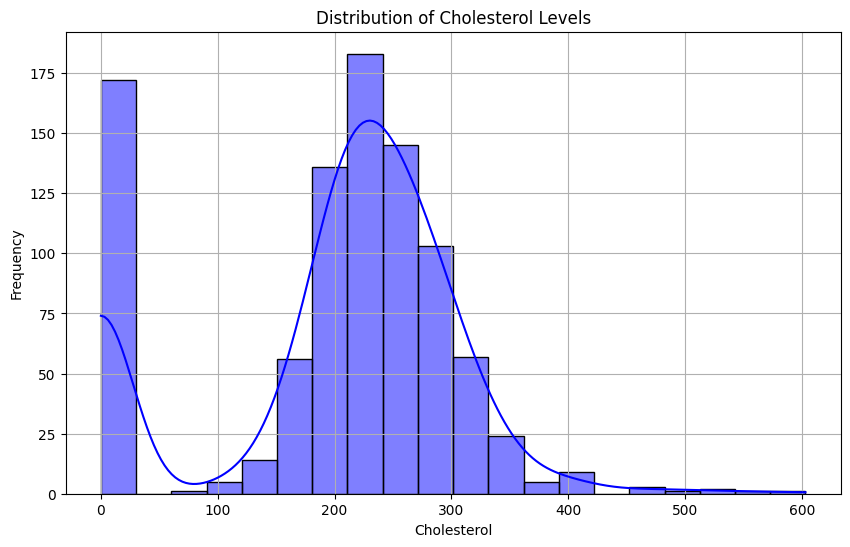

In [126]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cholesterol', bins=20, kde=True, color='blue')
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### 7. How many people have heart diseases, and how many don't have heart disease in this dataset?

In [127]:
count_heart_diseases = df['HeartDisease'].value_counts()
print(count_heart_diseases)

HeartDisease
1    508
0    410
Name: count, dtype: int64


<ipython-input-128-0b3fed3eb4e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data= df, palette='Set2')


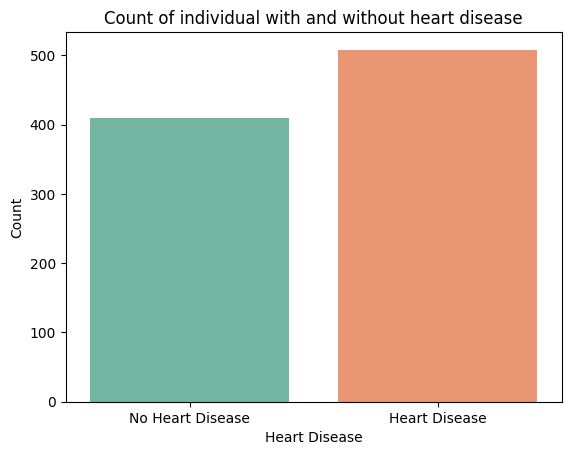

In [128]:
sns.countplot(x='HeartDisease', data= df, palette='Set2')
plt.title("Count of individual with and without heart disease")
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

#### 8. Find Count of Male & Female in this dataset?

In [129]:
Count_of_male_female = df['Sex'].value_counts()
print(Count_of_male_female)

Sex
M    725
F    193
Name: count, dtype: Int64


#### 9. Find Gender Distribution according to the heart diseases?

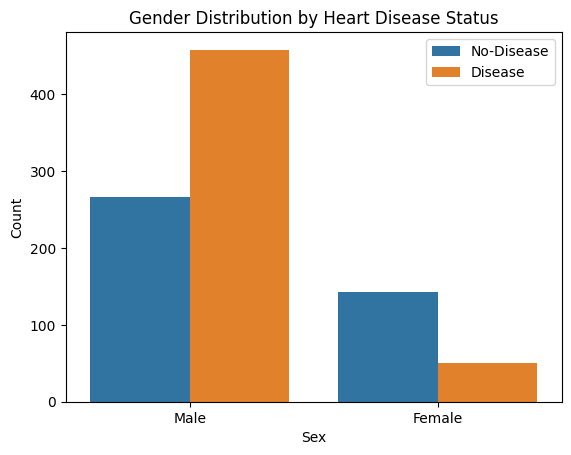

In [130]:
sns.countplot(x='Sex', hue='HeartDisease', data= df)
plt.xticks(['M',"F"], ['Male', "Female"])
plt.legend(labels=['No-Disease', 'Disease'])
plt.title('Gender Distribution by Heart Disease Status')
plt.xlabel("Sex")
plt.ylabel('Count')
plt.show()

#### 10. What is the frequency distribution of chest pain types?

In [131]:
chest_pain_counts = df['ChestPainType'].value_counts()
print(chest_pain_counts)

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64


<ipython-input-132-1cadfdbb98c9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chest_pain_counts.values, y=chest_pain_counts.index, palette='muted')


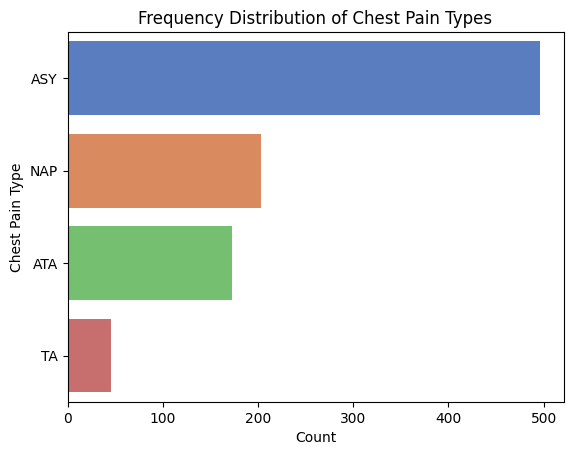

In [132]:
sns.barplot(x=chest_pain_counts.values, y=chest_pain_counts.index, palette='muted')
plt.title('Frequency Distribution of Chest Pain Types')
plt.xlabel('Count')
plt.ylabel('Chest Pain Type')
plt.show()

#### 11. Is there a relationship between age and cholesterol levels?

In [133]:
correlation = df['Age'].corr(df['Cholesterol'])
print(correlation)

-0.09528177118121911


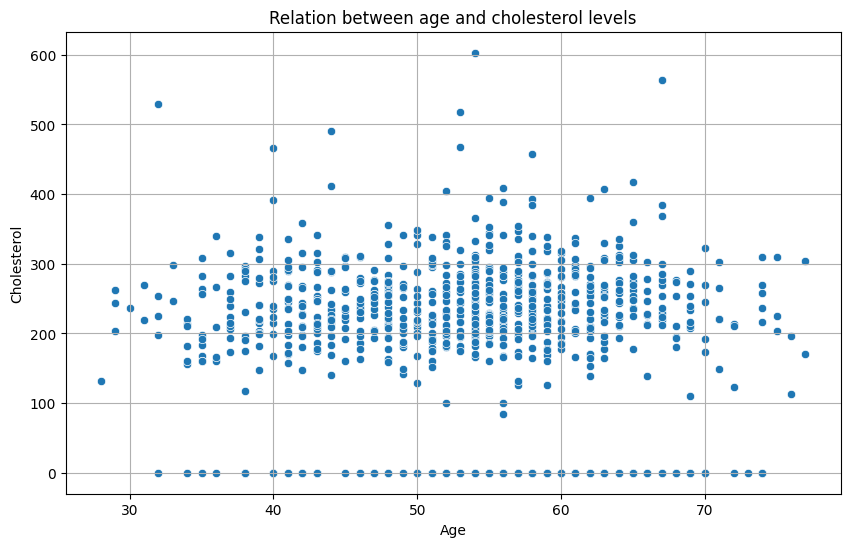

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Cholesterol', data = df)
plt.title('Relation between age and cholesterol levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

#### 12. How does the maximum heart rate (MaxHR) vary with age?

<ipython-input-135-b97540f3ead0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeGroup', y='MaxHR', data=df, palette='Set3')


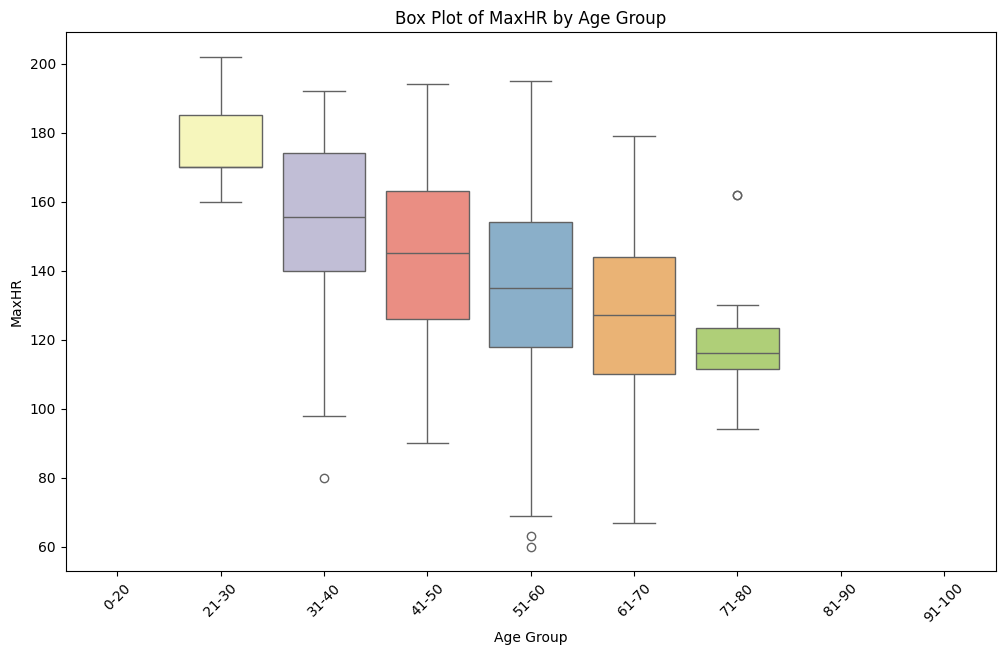

In [135]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Box plot for age groups
plt.figure(figsize=(12, 7))
sns.boxplot(x='AgeGroup', y='MaxHR', data=df, palette='Set3')
plt.title('Box Plot of MaxHR by Age Group')
plt.xlabel('Age Group')
plt.ylabel('MaxHR')
plt.xticks(rotation=45)
plt.show()

#### 13. How does resting blood pressure vary across different chest pain types?

<ipython-input-136-db6b458142a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='RestingBP', y='ChestPainType', data = df, palette='Set2')


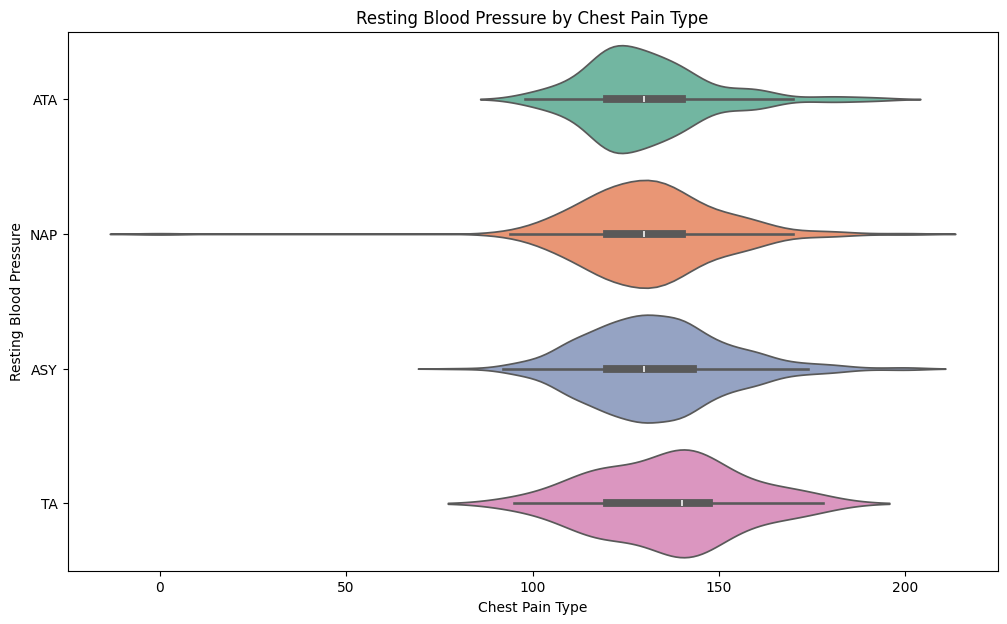

In [136]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='RestingBP', y='ChestPainType', data = df, palette='Set2')
plt.title('Resting Blood Pressure by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure')
plt.show()

In [137]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'AgeGroup'],
      dtype='object')

#### 14. What percentage of patients experience exercise-induced angina?

In [138]:
# Calclate total Number of patients
total_patients = len(df)
print(total_patients)

918


In [139]:
# Calculate the number of patients with exercise-induced angina
angina_patients = df['ExerciseAngina'].value_counts()['Y']
print(angina_patients)

371


In [140]:
# Calculate the percentage
percentage_angina = (angina_patients / total_patients) * 100
print(percentage_angina)

40.41394335511983


#### 15. What is the distribution of ST depression induced by exercise relative to rest (Oldpeak)?

<ipython-input-141-29b61474f73c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ChestPainType', y='Oldpeak', data=mean_oldpeak, palette='Set2')


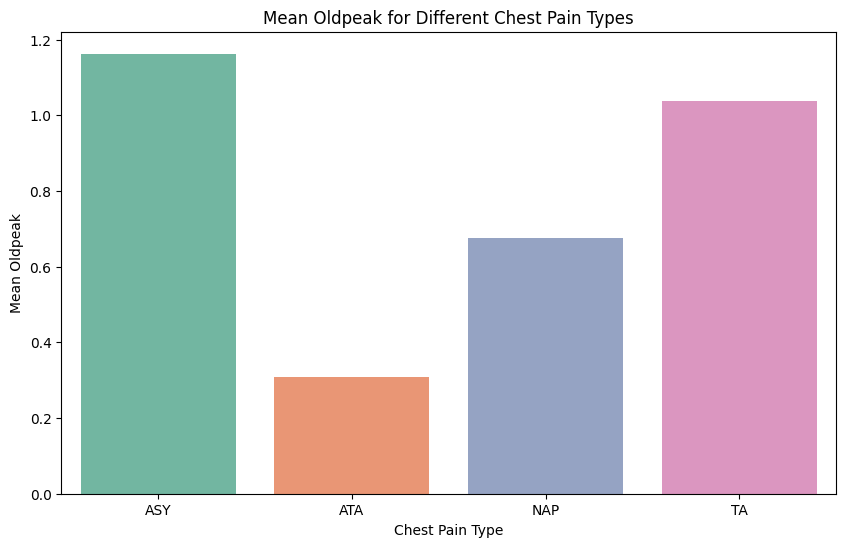

In [141]:
mean_oldpeak = df.groupby('ChestPainType')['Oldpeak'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='ChestPainType', y='Oldpeak', data=mean_oldpeak, palette='Set2')
plt.title('Mean Oldpeak for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Mean Oldpeak')
plt.show()

#### 16. What is the relationship between heart disease and other risk factors such as age, cholesterol, and resting blood pressure?

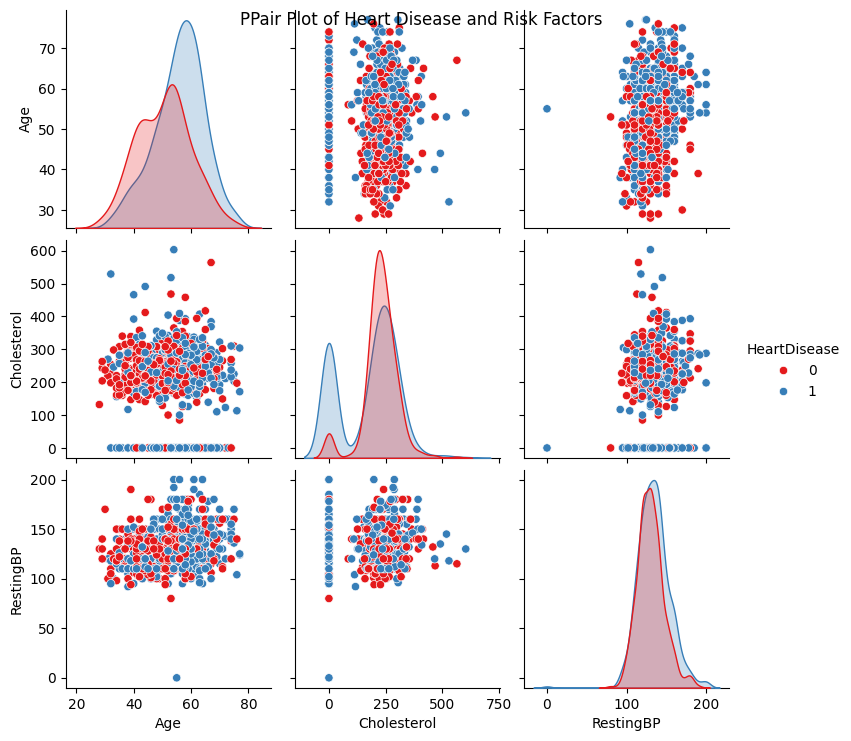

In [142]:
columns_of_interest = ['Age', 'Cholesterol', 'RestingBP', 'HeartDisease']
sns.pairplot(df[columns_of_interest], hue='HeartDisease', palette='Set1')
plt.suptitle("PPair Plot of Heart Disease and Risk Factors")
plt.show()

### Interpretation and Insights:
The analysis of the heart disease dataset revealed several key insights. There is a mild positive correlation between age and cholesterol levels, suggesting a potential health risk with increasing age. The distribution of chest pain types varies, indicating diverse symptomatology among patients. Notably, a percentage of patients experience exercise-induced angina, warranting careful monitoring during physical activities. The prevalence of heart disease underscores the importance of early detection and preventive measures. Regular monitoring of vital signs such as cholesterol levels and resting blood pressure is essential for at-risk individuals. Lifestyle modifications, including regular exercise and a healthy diet, are recommended to reduce the risk of heart disease. Overall, these insights emphasize the need for proactive measures and personalized interventions to promote cardiovascular health and mitigate the burden of heart disease.

### Conclusion
The analysis of the heart disease dataset provided valuable insights into the factors affecting heart health. By examining various health indicators such as age, cholesterol levels, and chest pain types, we identified significant patterns and relationships. These findings can be utilized to enhance diagnostic processes and preventive measures for heart disease.